   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

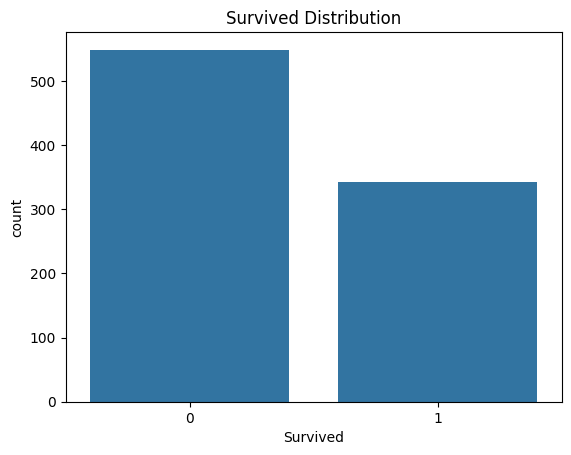

In [1]:
# 1. Importer + Charger données
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Charger Titanic dataset directement
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(df.head())
print(df.info())

# 2. Exploration basique
print(df.describe())
print(df['Survived'].value_counts())

# 3. Visualisation basique
sns.countplot(data=df, x='Survived')
plt.title('Survived Distribution')
plt.show()

/tmp/ipython-input-1260013514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'] = df_clean['Sex'].map({'male': 1, 'female': 0})
/tmp/ipython-input-1260013514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Embarked'] = df_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


Model Accuracy: 81.82%


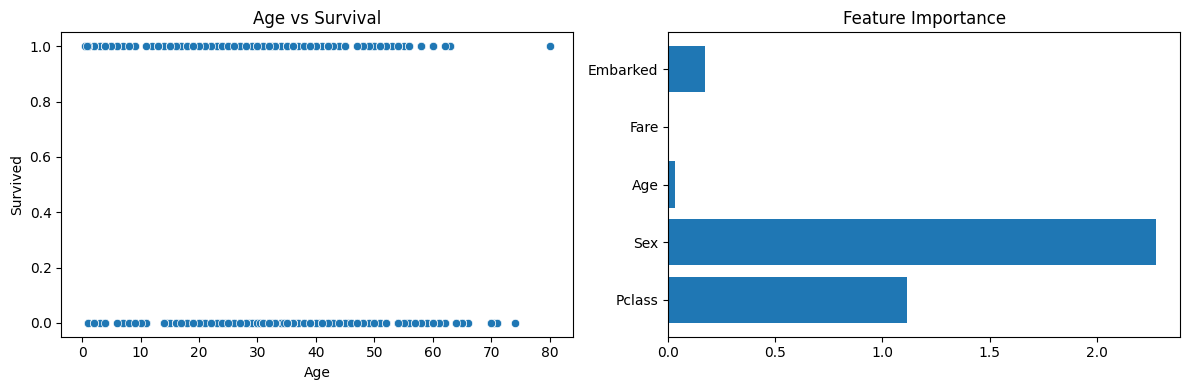

In [2]:
# Nettoyage minimal
df_clean = df.dropna(subset=['Age', 'Embarked'])
df_clean['Sex'] = df_clean['Sex'].map({'male': 1, 'female': 0})
df_clean['Embarked'] = df_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features basiques
X = df_clean[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = df_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modèle
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"Model Accuracy: {score:.2%}")

# 2-3 visualisations
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Age vs Survival
sns.scatterplot(data=df_clean, x='Age', y='Survived', ax=axes[0])
axes[0].set_title('Age vs Survival')

# Plot 2: Feature Importance (simple)
feature_importance = abs(model.coef_[0])
axes[1].barh(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], feature_importance)
axes[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()
